In [202]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as mtp 
import plotly.express as px 
from scipy import stats
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from tensorflow import keras
from keras.layers import Dense , LSTM 

In [2]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [3]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [5]:
print(data.describe())

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [6]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
city_no = data['City'].value_counts()

fig = px.pie(values=city_no, names=city_no.index, title='Pie Chart City',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig2 = px.histogram(data, x='City', title='City Distribution Histogram' ,
                    color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()
fig2.show()

In [8]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [9]:
data = data.drop(['Posted On' , 'Point of Contact' , 'Floor'] , axis = 1)

In [10]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [11]:
area_localities_per_city = data.groupby('City')['Area Locality'].nunique()
print(area_localities_per_city)



City
Bangalore    429
Chennai      323
Delhi        289
Hyderabad    343
Kolkata      252
Mumbai       604
Name: Area Locality, dtype: int64


In [12]:
data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [13]:
data['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [14]:
data['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [200]:
pd.get_dummies(data, columns=['City'], prefix='City')

,BHK,Rent,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom,City_Bangalore,City_Chennai,...,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Super Area,Bandel,Unfurnished,Bachelors/Family,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,0,0,1,0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Semi-Furnished,Bachelors/Family,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,1,0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Semi-Furnished,Bachelors/Family,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,1,0
3,2,10000,800,Super Area,Dumdum Park,Unfurnished,Bachelors/Family,1,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,0,0,1,0
4,2,7500,850,Carpet Area,South Dum Dum,Unfurnished,Bachelors,1,0.0,0.0,...,1.0,0.0,1.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Semi-Furnished,Bachelors/Family,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,1,0,0
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Semi-Furnished,Bachelors/Family,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Semi-Furnished,Bachelors/Family,3,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,1,0,0
4744,3,45000,1500,Carpet Area,Gachibowli,Semi-Furnished,Family,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,1,0,0


In [16]:
avg_rent = [data['Rent'].loc[data['City']==i].sum()/data['Rent'].loc[data['City']==i].shape[0] for i in data['City'].unique().tolist()]
px.bar(x=data['City'].unique().tolist(), y=avg_rent, color=avg_rent, color_continuous_scale='jet',text_auto = True)

In [17]:
# furnishing_mapping = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 3}
# data['Furnishing Status'] = data['Furnishing Status'].map(furnishing_mapping)


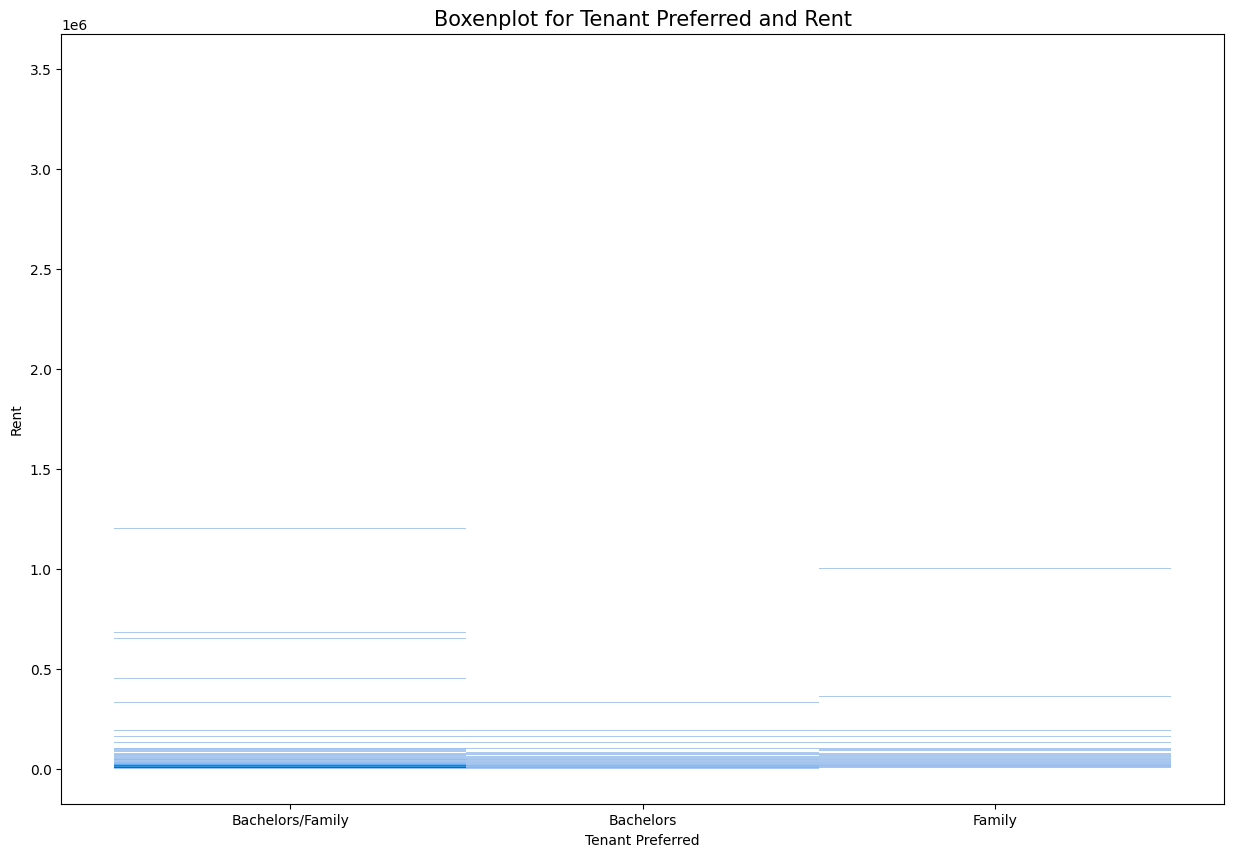

In [18]:
fig,axes = mtp.subplots(figsize=(15,10))
sns.histplot(x="Tenant Preferred", y='Rent',data=data)
mtp.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
mtp.show()

In [58]:
# Calculate point-biserial correlation coefficient
point_biserial_corr, p_value = stats.pointbiserialr(data['Tenant Binary'], data['Rent'])
print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

KeyError: 'Tenant Binary'

THus as the Coeeficient is close to 0 their is no linear realtionsip beweem them 

In [ ]:
data = data.drop(['Tenant Preferred' , 'Tenant Binary'],axis =1)

In [ ]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,1,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,0,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,0,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,1,2
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,1,3
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,1,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,1,2


In [ ]:


# Perform ANOVA
anova_result = stats.f_oneway(data[data['Area Type'] == 'Super Area']['Rent'],
                        data[data['Area Type'] == 'Carpet Area']['Rent'])

# Print the ANOVA result
print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


ANOVA Result:
F-statistic: nan
p-value: nan


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning:

at least one input has length 0



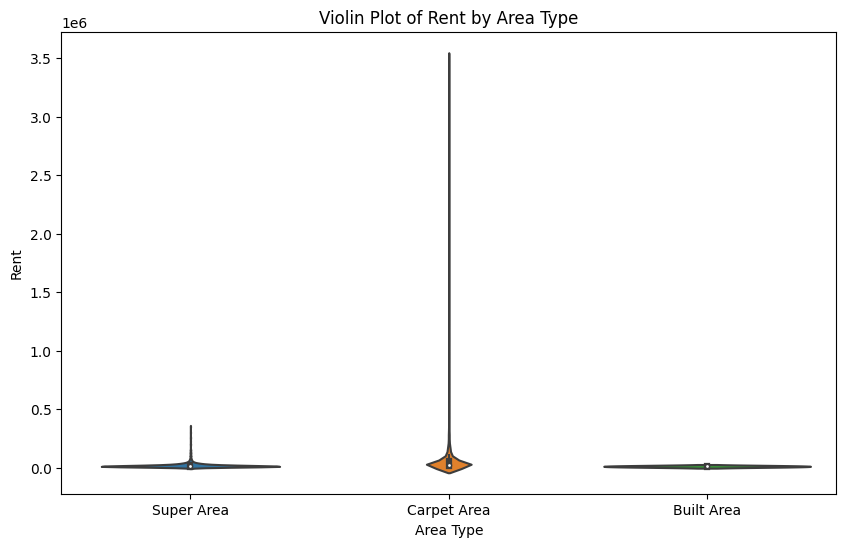

In [59]:
# Violin plot
mtp.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Area Type', y='Rent')
mtp.title('Violin Plot of Rent by Area Type')
mtp.xlabel('Area Type')
mtp.ylabel('Rent')
mtp.show()


In [ ]:
# # Map 'Area Type' categories to numerical values
# data['Area Type'] = data['Area Type'].map({'Carpet Area': 3, 'Super Area': 1, 'Built Area': 0})


In [61]:
point_biserial_corr, p_value = stats.pointbiserialr(data['Area Type'].map({'Carpet Area': 3, 'Super Area': 1, 'Built Area': 0}), data['Rent'])
print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.21576763371675337
P-value: 4.135707523973244e-51


In [62]:
onehot_encoder = OneHotEncoder()

city_reshaped = data['City'].values.reshape(-1, 1)
city_encoded = onehot_encoder.fit_transform(city_reshaped)

city_encoded_df = pd.DataFrame(city_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['City']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, city_encoded_df], axis=1)

# Display the encoded DataFrame
data.head(5)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
furnishing_Status_R = data['Furnishing Status'].values.reshape(-1, 1)
fs_encoded = onehot_encoder.fit_transform(furnishing_Status_R)

fs_encoded_df = pd.DataFrame(fs_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['Furnishing Status']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, fs_encoded_df], axis=1)

In [64]:
atr = data['Area Type'].values.reshape(-1, 1)
atr_en = onehot_encoder.fit_transform(atr)

atrdf = pd.DataFrame(atr_en.toarray(), columns=onehot_encoder.get_feature_names_out(['Area Type']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, atrdf], axis=1)

In [65]:
data.head(5)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,City_Bangalore,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


/var/folders/ys/f1dtzjmj589424_wn9_wp8t80000gn/T/ipykernel_36223/1382016858.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



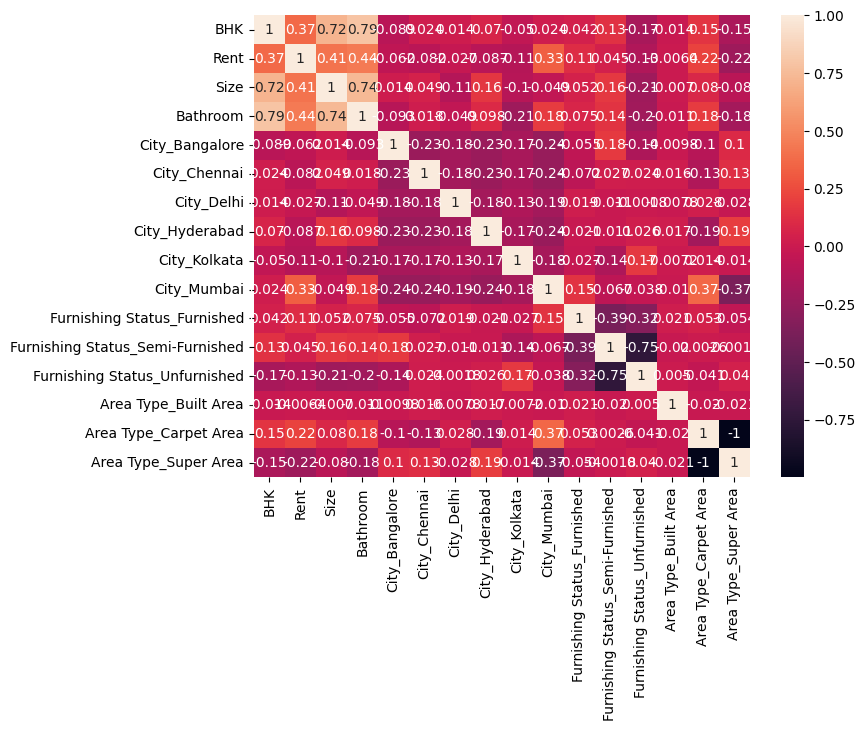

In [66]:
corr = data.corr()
mtp.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
mtp.show()

In [67]:
X = data.drop(['City' , 'Area Locality','Rent' , 'Area Type' , 'Furnishing Status' ,'Tenant Preferred'],axis=1)
y = data['Rent']

In [68]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.25, random_state=42)

In [69]:
X_train

,BHK,Size,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
1196,2,1300,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2215,2,630,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1598,1,600,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1532,2,1045,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1501,2,600,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3,1500,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
466,3,1200,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3092,2,800,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3772,3,3500,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [70]:
y_train

1196    250000
2215     12000
1598      4500
1532     18000
1501     10000
         ...  
4426     25000
466      20000
3092     20000
3772     85000
860      25000
Name: Rent, Length: 3559, dtype: int64

In [71]:
def print_metrics(x,y):
    mae = mean_absolute_error(x, y)
    mse = mean_squared_error(x, y)
    rmse = mean_squared_error(x, y, squared=False)
    r2 = r2_score(x, y)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2):", r2)
    return mae , mse , rmse , r2

    

# Linear Regression

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {
    'fit_intercept': [True, False]
    # 'normalize': [True, False]
}

In [74]:
lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# lr.fit(X_train , y_train)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

In [175]:
lr.fit(X_train , y_train)

LinearRegression()

In [176]:
test_score

0.5343456695304359

In [179]:
y_pred = lr.predict(X_test)

In [180]:
linear_mae , linear_mse , linear_rmse , linear_r2 = print_metrics(y_test , y_pred)


Mean Absolute Error (MAE): 22157.141123220517
Mean Squared Error (MSE): 1771622885.146745
Root Mean Squared Error (RMSE): 42090.650804504614
R-squared (R^2): 0.5343456695304359


In [203]:
# y_train= y_train.values.reshape(-1,1)
# y_test= y_test.values.reshape(-1,1)


sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
scaled_X_train = sc_X.fit_transform(X_train)
scaled_X_test = sc_X.fit_transform(X_test)
scaled_y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))
scaled_y_test = sc_y.fit_transform(y_test.values.reshape(-1,1))

In [204]:
X_train

,BHK,Size,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
1196,2,1300,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2215,2,630,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1598,1,600,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1532,2,1045,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1501,2,600,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3,1500,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
466,3,1200,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3092,2,800,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3772,3,3500,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [205]:
scaled_X_train

array([[0.2       , 0.16145181, 0.11111111, ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.077597  , 0.11111111, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.0738423 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.2       , 0.09887359, 0.11111111, ..., 0.        , 1.        ,
        0.        ],
       [0.4       , 0.43679599, 0.22222222, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.05506884, 0.11111111, ..., 0.        , 1.        ,
        0.        ]])

In [199]:
y_test

1566    16000
3159    12000
538     28000
2630     8000
4418    46000
        ...  
978     65000
2458     6000
2471    75000
1432    31000
2395    22000
Name: Rent, Length: 1187, dtype: int64

In [206]:
scaled_y_test

array([[0.01185111],
       [0.00851277],
       [0.02186613],
       ...,
       [0.06109164],
       [0.02436989],
       [0.01685862]])

# SVM

In [82]:
scm = SVR(kernel='poly' , C = 2)

In [156]:
scm.fit(X_train , y_train)

SVR(C=2, kernel='poly')

In [157]:
y_pred_2 = scm.predict(X_test)

In [158]:
svr_mae , svr_mse ,svr_rmse ,svr_r2 = print_metrics(y_test , y_pred_2)

Mean Absolute Error (MAE): 22370.66554116845
Mean Squared Error (MSE): 3282261998.202884
Root Mean Squared Error (RMSE): 57291.02895046383
R-squared (R^2): 0.1372884568081999


# RAndom Forest Regressor

In [207]:
rfr = RandomForestRegressor(n_estimators=1000 , random_state=42)

In [208]:
rfr.fit(scaled_X_train , scaled_y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=1000, random_state=505)

In [209]:
y_pred_3 = rfr.predict(scaled_X_test)

In [210]:
rf_mae , rf_mse ,rf_rmse ,rf_r2 = print_metrics(scaled_y_test , y_pred_3)

Mean Absolute Error (MAE): 0.015827075310471325
Mean Squared Error (MSE): 0.0016317720582926017
Root Mean Squared Error (RMSE): 0.04039519845591307
R-squared (R^2): 0.3842413985573504


# Nueral Network Regressor

In [211]:
model = keras.Sequential()
model.add(LSTM(128, return_sequences=True, 
               input_shape= (scaled_X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(scaled_X_train,scaled_y_train, epochs=21, batch_size=64, validation_split=0.2 )


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 15, 128)           66560     
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 118081 (461.25 KB)
Trainable params: 118081 (461.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/21
45/45 [==============================] - 5s 38ms/step - loss: 8.4649e-04 - val_loss: 2.8314e-04
Epoch 2/21
45/45 [=====================

In [212]:
y_pred_4 = model.predict(scaled_X_test)

38/38 [==============================] - 1s 5ms/step


In [219]:
y_pred_4

array([[6.1059669e-03],
       [4.7814352e-03],
       [2.5226036e-02],
       ...,
       [1.8332414e-02],
       [1.6472111e-02],
       [6.7728339e-05]], dtype=float32)

In [189]:
 # Inverse scale your predictions


In [214]:
predictions

array([[15291.3955],
       [20898.738 ],
       [48237.934 ],
       ...,
       [35902.254 ],
       [38590.27  ],
       [11973.5205]], dtype=float32)

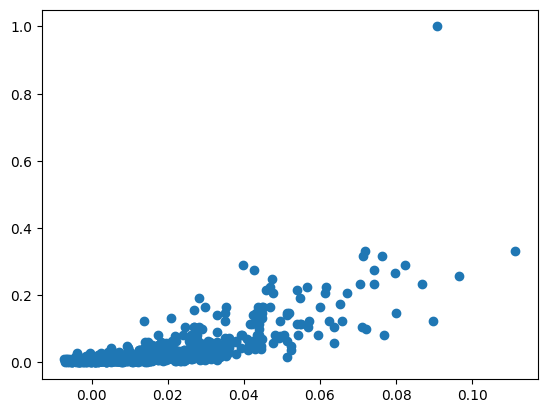

In [220]:
import matplotlib.pyplot as mtp 
mtp.scatter(y_pred_4 , scaled_y_test)

In [221]:
nn_mae , nn_mse ,nn_rmse ,nn_r2 = print_metrics(scaled_y_test , y_pred_4)

Mean Absolute Error (MAE): 0.016208744754148637
Mean Squared Error (MSE): 0.0018938152654070387
Root Mean Squared Error (RMSE): 0.043517987837295956
R-squared (R^2): 0.2853578823760733


In [217]:
original_predictions = sc_y.inverse_transform(y_pred_4.reshape(-1, 1))


In [222]:
original_predictions

array([[ 9116.17  ],
       [ 7529.1157],
       [32025.836 ],
       ...,
       [23765.898 ],
       [21536.883 ],
       [ 1881.1521]], dtype=float32)

# Lasso

In [93]:
lasso = Lasso(alpha=0.5)

In [94]:
lasso.fit(X_train , y_train)

Lasso(alpha=0.5)

In [95]:
y_pred_5 = lasso.predict(X_test)

In [131]:
lasso_mae ,lasso_mse ,lasso_rmse ,lasso_r2 = print_metrics(y_test , y_pred_5)

Mean Absolute Error (MAE): 22156.60109069568
Mean Squared Error (MSE): 1771610637.3739357
Root Mean Squared Error (RMSE): 42090.50531145873
R-squared (R^2): 0.5343488887417562


# Ridge

In [97]:
ridge = Ridge(alpha=0.3) 
ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [98]:
y_pred_6 = ridge.predict(X_test)

In [99]:
ridge_mae,ridge_mse,ridge_rmse,ridge_r2 = print_metrics(y_test , y_pred_6)

Mean Absolute Error (MAE): 22155.02890617837
Mean Squared Error (MSE): 1771625832.525225
Root Mean Squared Error (RMSE): 42090.68581676028
R-squared (R^2): 0.5343448948398604


# Gradient Boosting Regressor

In [100]:
gb = GradientBoostingRegressor()

In [101]:
gb.fit(scaled_X_train , scaled_y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor()

In [102]:
y_pred_7 = gb.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



In [103]:
gb_mae,gb_mse,gb_rmse,gb_r2 = print_metrics(scaled_y_test  , y_pred_7)

Mean Absolute Error (MAE): 2.557658561445057
Mean Squared Error (MSE): 9.028494211370154
Root Mean Squared Error (RMSE): 3.00474528227771
R-squared (R^2): -8.028494211370155


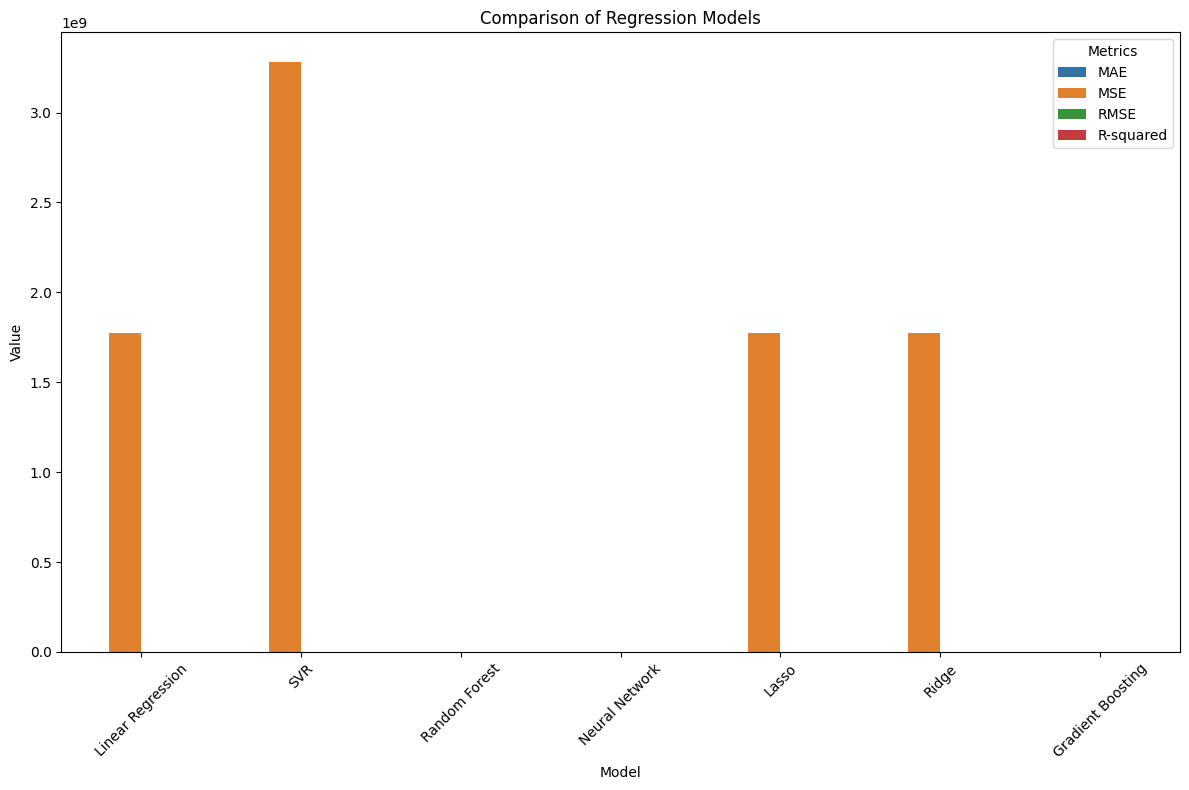

In [104]:


models = ['Linear Regression', 'SVR', 'Random Forest', 'Neural Network', 'Lasso', 'Ridge', 'Gradient Boosting']
mae = [linear_mae, svr_mae, rf_mae, nn_mae, lasso_mae, ridge_mae, gb_mae]
mse = [linear_mse, svr_mse, rf_mse, nn_mse, lasso_mse, ridge_mse, gb_mse]
rmse = [linear_rmse, svr_rmse, rf_rmse, nn_rmse, lasso_rmse, ridge_rmse, gb_rmse]
r2 = [linear_r2, svr_r2, rf_r2, nn_r2, lasso_r2, ridge_r2, gb_r2]


results = pd.DataFrame({'Model': models, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2})

# Melt the DataFrame for easier plotting
results_melted = pd.melt(results, id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot
mtp.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=results_melted)
mtp.title('Comparison of Regression Models')
mtp.xlabel('Model')
mtp.ylabel('Value')
mtp.xticks(rotation=45)
mtp.legend(title='Metrics')
mtp.tight_layout()
mtp.show()


In [105]:
# Define the scale factor
scale_factor = 1000

# Scale the metrics
mae_scaled = [mae_val * scale_factor for mae_val in mae]
mse_scaled = [mse_val * scale_factor for mse_val in mse]
rmse_scaled = [rmse_val * scale_factor for rmse_val in rmse]

# Create a DataFrame
results_df_scaled = pd.DataFrame({
    'Model': models,
    'MAE': mae_scaled,
    'MSE': mse_scaled,
    'RMSE': rmse_scaled,
    'R-squared': r2
})

# Set 'Model' as the index
results_df_scaled.set_index('Model', inplace=True)

print(results_df_scaled)


                            MAE           MSE          RMSE  R-squared
Model                                                                 
Linear Regression  2.215714e+07  1.771623e+12  4.209065e+07   0.534346
SVR                2.237067e+07  3.282262e+12  5.729103e+07   0.137288
Random Forest      2.687893e+02  8.473340e+02  9.205075e+02   0.152666
Neural Network     2.319795e+02  3.751708e+02  6.125118e+02   0.624829
Lasso              2.215660e+07  1.771611e+12  4.209051e+07   0.534349
Ridge              2.215503e+07  1.771626e+12  4.209069e+07   0.534345
Gradient Boosting  2.557659e+03  9.028494e+03  3.004745e+03  -8.028494


In [106]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,City_Bangalore,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [223]:
def preprocess(l):
    all_fs = ['Furnished' , 'Semi-Furnished' , 'Unfurnished']
    all_at = ['Built Area' , 'Carpet Area' , 'Super Area']
    
    area_type_mapping = OneHotEncoder(sparse=False , categories=[all_at])
    area_type_encoded = area_type_mapping.fit_transform([[l[2]]])
    all_cities = ['Bangalore', 'Delhi', 'Chennai', 'Hyderabad', 'Kolkata', 'Mumbai']
    onehot_encoder = OneHotEncoder(sparse=False , categories=[all_cities])
    city_encoded = onehot_encoder.fit_transform([[l[3]]])  

    furnishing_status_mapping = OneHotEncoder(sparse=False , categories=[all_fs])
    furnishing_status_encoded = furnishing_status_mapping.fit_transform([[l[4]]])
    
    bathroom = int(l[5])
    
    preprocessed_features = [l[0], l[1], *area_type_encoded.flatten(), *city_encoded.flatten(), *furnishing_status_encoded.flatten(), bathroom]
    
    return preprocessed_features


In [228]:
bhk = 3
size = 750
area_type = 'Carpet Area'
city = 'Mumbai'
furnishing_Status = 'Furnished'
bath = 3
l = [bhk , size , area_type , city , furnishing_Status , bath]
predict_rent(l)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:



[[  3. 750.   0.   1.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.
    3.]]
1/1 [==============================] - 0s 18ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



(array([-16566.35396179]),
 array([14692.21093038]),
 array([0.03982848]),
 array([[1180397.4]], dtype=float32),
 array([-7151.76820227]),
 array([-16097.98698637]),
 array([0.03751014]))

In [224]:
def predict_rent(array):
    # Preprocess the input features
    preprocessed_input = preprocess(array)
    preprocessed_input = np.array(preprocessed_input)
    preprocessed_input = preprocessed_input.reshape(1,-1)
    print(preprocessed_input)
    # Predict rent using each model
    linear_pred = lr.predict(preprocessed_input)
    svr_pred = scm.predict(preprocessed_input)
    rf_pred = rfr.predict(preprocessed_input)
    nn_pred = model.predict(preprocessed_input)
    nn_predictions = sc_y.inverse_transform(nn_pred.reshape(-1,1)) 
    lasso_pred = lasso.predict(preprocessed_input)
    ridge_pred = ridge.predict(preprocessed_input)
    gb_pred = gb.predict(preprocessed_input)
    
    return linear_pred , svr_pred , rf_pred , nn_predictions , lasso_pred , ridge_pred , gb_pred
    # Calculate error metrics for each model
    # linear_mae = mean_absolute_error(y_test, linear_pred)
    # svr_mae = mean_absolute_error(y_test, svr_pred)
    # rf_mae = mean_absolute_error(y_test, rf_pred)
    # nn_mae = mean_absolute_error(y_test, nn_pred)
    # lasso_mae = mean_absolute_error(y_test, lasso_pred)
    # ridge_mae = mean_absolute_error(y_test, ridge_pred)
    # gb_mae = mean_absolute_error(y_test, gb_pred)
    
    # Determine the best model based on MAE
    # mae_values = [linear_mae, svr_mae, rf_mae, nn_mae, lasso_mae, ridge_mae, gb_mae]
    # best_mae = min(mae_values)
    # best_model_index = mae_values.index(best_mae)
    
    # # Return the predicted rent and the chosen error metric for the best model
    # if best_model_index == 0:
    #     return linear_pred, "Linear Regression (MAE)"
    # elif best_model_index == 1:
    #     return svr_pred, "SVR (MAE)"
    # elif best_model_index == 2:
    #     return rf_pred, "Random Forest (MAE)"
    # elif best_model_index == 3:
    #     return nn_pred, "Neural Network (MAE)"
    # elif best_model_index == 4:
    #     return lasso_pred, "Lasso Regression (MAE)"
    # elif best_model_index == 5:
    #     return ridge_pred, "Ridge Regression (MAE)"
    # else:
    #     return gb_pred, "Gradient Boosting (MAE)"
